# 实验1：典型监督学习方法分类实践与比较分析

## 1. 实验目的与要求
1. 利用所学习的监督学习方法完成目标识别实验方案的设计。
2. 编程并利用相关软件完成实验测试，得到实验结果。
3. 通过对实验数据的分析, 整理, 方法的对比, 得出实验结论, 培养学生创新思维和编写实验报告的能力, 以及处理一般工程设计技术问题的初步能力及实事求是的科学态度。
4. 利用实验更加直现、方便和易于操作的优势，提高学生学习兴趣，让学生自主发挥设计和实施实验，发挥学生潜在的积极性和创造性。

---

## 2. 实验主要内容
1. 采用已经学过的监督学习的方法，如：逻辑回归、决策树、神经网络等实现分类任务。
2. 分析比较不同方法的优缺点

---

## 3. 数据源

| 数据集特征 | 多变量 | 实例数  | 150  |    分区    |    life    |
| :--------: | :----: | :-----: | :--: | :--------: | :--------: |
|  属性特征  |  Real  | 属性数  |  4   |  捐赠日期  | 1988-07-01 |
|  相关任务  |  分类  | 缺失值? |  无  | 网页点击数 |  4121103   |

[数据源](http://archive.ics.uci.edu/ml/datasets/Iris)


### 数据集信息

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

这可能是模式识别文献中最著名的数据库。Fisher 的论文是该领域的经典之作，至今仍被频繁引用(例如，参见 Duda & Hart。）该数据集包含 3 个类别，每个类别 50 个实例，其中每个类别指的是一种鸢尾属植物。一类与另两类是线性可分的；后者不是线性可分离的。

Predicted attribute: class of iris plant.    
预测属性：鸢尾属植物类。

This is an exceedingly simple domain.    
这是一个非常简单的领域。

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

该数据与 Fishers 文章中的数据不同（由 Steve Chadwick、spchadwick '@' espedaz.net确定）。第35个样本应为：4.9,3.1,1.5,0.2，“Iris setosa”，其中误差在第四个特征中。第38个样本：4.9,3.6,1.4,0.1，“Iris setosa”，其中错误出现在第二和第三个特征中。


### 属性信息

1. sepal length in cm    
   萼片长度
2. sepal width in cm    
   萼片宽度
3. petal length in cm      
   花瓣长度 
4. petal width in cm    
   花瓣宽度
5. class:      
   类别    
-- Iris Setosa  山鸢尾    
-- Iris Versicolour  变色鸢尾    
-- Iris Virginica  弗吉尼亚鸢尾    

-----

### 数据可视化


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


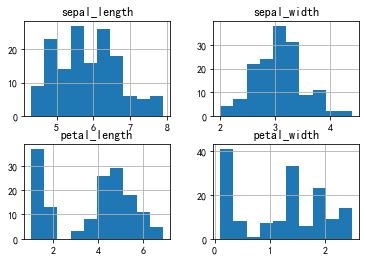

In [28]:
import pandas
import matplotlib.pyplot as plt

dataset = pandas.read_csv('iris.data')  # 读取csv数据
print(dataset.describe())
#直方图 histograms
dataset.hist()
plt.show()



## 逻辑回归

- [温州大学《机器学习》课程课件（三）逻辑回归](https://zhuanlan.zhihu.com/p/361621889)



----

### 分类问题

#### 监督学习的最主要类型

- 分类（Classification） 

  > 标签离散

  - 身高1.85m，体重100kg的男人穿什么尺码的T恤？
  - 根据肿瘤的体积、患者的年龄来判断良性或恶性？ 
  - 根据用户的年龄、职业、存款数量来判断信用卡是否会违约？

> 输入变量可以是离散的，也可以是连续的

---

#### 二分类

我们先从用蓝色圆形数据定义为类型1，其余数据为类型2；只需要分类1次

步骤：① ->②

<!-- ![image-20210802081155852](http://cdn.ayusummer233.top/img/20210802081202.png) -->



---

#### 多分类

我们先定义其中一类为类型1（正类），其余数据为负类（rest）；

接下来去掉类型1数据，剩余部分再次进行二分类，分成类型2和负类；

如果有𝑛类，那就需要分类 𝑛-1 次

步骤：① -> ② -> ③ -> ……

<!-- ![image-20210802081340700](http://cdn.ayusummer233.top/img/20210802081340.png) -->

----



### Sigmoid 函数

𝜎(𝑧) 代表一个常用的逻辑函数（logistic function）, 为𝑆形函数（Sigmoid function）

$\sigma (z) = g(z) = \frac{1}{1+e^{-z}}$

$z=w^Tx+b$

合起来，我们得到逻辑回归模型的假设函数：

$L(\hat{y}, y) = -y log\hat{y} - (1-y) log(1- \hat{y})$

<!-- ![](http://cdn.ayusummer233.top/img/20210802091615.png) -->

当 $\sigma(z) \geq 0.5$​  时, 预测 $y=1$​

当 $\sigma(z) < 0.5$​​  时, 预测 $y=0$

> 注意: 若表达式 $h(x) = z =  w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n + b $​, 则 b 可以融入到 $w_0$​, 即: $z=w^Tx$​

线性回归的函数 $h(x) = z = w^Tx$​, 范围是 $(−∞, +∞)$。

而分类预测结果需要得到 $[0,1]$ 的概率值。

在二分类模型中，事件的几率 odds：事件发生与事件不发生的概率之比为 $\frac{p}{1-p}$, 称为事件的发生比（the odds of experiencing an event）

其中𝑝为随机事件发生的概率，𝑝的范围为 $[0,1]$。

取对数得到：$log \frac{p}{1-p}$ 而 $log \frac{p}{1-p} = w^T x = z$

求解得到：$p = \frac{1}{1+ e^{-w^T x}} = \frac{1}{1+e^{-z}}$​

将 𝑧 进行逻辑变换: $g(z) = \frac{1}{1+e^{-z}}$

$g'(z) = (\frac{1}{1+e^{-z}})' \\ = \frac{e^{-z}}{(1+e^{-z})^2} \\ = \frac{1 + e^{-z} - 1}{(1+e^{-z})^2} \\ = \frac{1}{(1 + e^{-z})}(1 - \frac{1}{1 + e^{-z}}) \\ = g(z)(1 - g(z))$





---

### 逻辑回归求解

假设一个二分类模型： 

$p(y = 1|x; w) = h(x)$

$p(y=0|x;w) = 1-h(x)$

则: $p(y|x;w) = (h(x))^y(1-h(x))^{1-y}$​

逻辑回归模型的假设是: $h(x)=g(w^Tx)=g(z)$

其中 $z = w^Tx$​, 逻辑函数 (logistic function) 公式为:

$g(z)=\frac{1}{1+e^{-z}}, g'(z)=g(z)(1-g(z))$



---

#### 损失函数

$L(\hat{y}, y) = -y log(\hat{y}) - (1-y)log(1-\hat{y})$

为了衡量算法在全部训练样本上的表现如何, 我们需要定义一个算法的代价函数, 算法的代价函数是对 m 个样本的损失函数求和然后除以 m:

---

#### 代价函数

$J(w) = \frac{1}{m} \sum_{i=1}^m L(\hat{y}^{(i)}, y^{(i)}) = \frac{1}{m} \sum_{i=1}^m {( -y^{(i)} log(\hat{y}^{(i)}) - (1-y^{(i)})log(1-\hat{y}^{(i)}) )}$

---

#### 求解过程

似然函数为: 

$L(w) = \prod_{i=1}^m{P(y^{(i)} | x^{(i)}; w)} = \prod_{i=1}^m{ (h(x^{(i)}))^{y^{(i)}} (1 - h(x^{(i)}))^{1-y^{(i)}}}$

似然函数两边取对数, 则连乘号变成了连加号:

$l(w) = log L(w) = \sum_{i=1}^m{( y^{(i)} log( h(x^{(i)}) ) + (1 - y^{(i)}) log(1 - h(x^{(i)}))    )}$

代价函数为:

$J(w) = - \frac{1}{m} l(w) = - \frac{1}{m} \sum_{i=1}^m{( y^{(i)} log( h(x^{(i)}) ) + (1 - y^{(i)}) log(1 - h(x^{(i)}))    )}$

> [统计学](https://baike.baidu.com/item/统计学/1175)中，似然函数是一种关于[统计模型](https://baike.baidu.com/item/统计模型/7492984)参数的[函数](https://baike.baidu.com/item/函数/301912)。给定输出x时，关于参数θ的似然函数L(θ|x)（在数值上）等于给定参数θ后变量X的概率：L(θ|x)=P(X=x|θ)。
>
> 似然函数在[推断统计学](https://baike.baidu.com/item/推断统计学/10416457)（Statistical inference）中扮演重要角色，尤其是在参数估计方法中。在教科书中，似然常常被用作“概率”的同义词。但是在统计学中，二者有截然不同的用法。概率描述了已知参数时的随机变量的输出结果；似然则用来描述已知[随机变量](https://baike.baidu.com/item/随机变量/828980)输出结果时，未知参数的可能取值。例如，对于“一枚正反对称的硬币上抛十次”这种事件，我们可以问硬币落地时十次都是正面向上的“概率”是多少；而对于“一枚硬币上抛十次”，我们则可以问，这枚硬币正反面对称的“似然”程度是多少。





### 逻辑回归代码实现


#### 读取并查看数据源内容
从 `iris.data` 中读取几行数据  
可以看到它由 4 个特征和 1 个分类标签组成， 类别分类如下：
- `Iris-setosa`  山鸢尾
- `Iris-versicolor` 变色鸢尾
- `Iris-virginica` 弗吉尼亚鸢尾

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('iris.data')
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
92,5.8,2.6,4.0,1.2,Iris-versicolor
104,6.5,3.0,5.8,2.2,Iris-virginica
24,4.8,3.4,1.9,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
22,4.6,3.6,1.0,0.2,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica
76,6.8,2.8,4.8,1.4,Iris-versicolor
60,5.0,2.0,3.5,1.0,Iris-versicolor


为三种类别重新命名区分以便后续分类
- `Iris-setosa`  0
- `Iris-versicolor` 1
- `Iris-virginica` 2

In [2]:
data['class'] = data['class'].str.replace("Iris-setosa", '0')
data['class'] = data['class'].str.replace("Iris-versicolor", '1')
data['class'] = data['class'].str.replace("Iris-virginica", '2')
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
80,5.5,2.4,3.8,1.1,1
38,4.4,3.0,1.3,0.2,0
66,5.6,3.0,4.5,1.5,1
110,6.5,3.2,5.1,2.0,2
60,5.0,2.0,3.5,1.0,1
96,5.7,2.9,4.2,1.3,1
99,5.7,2.8,4.1,1.3,1
125,7.2,3.2,6.0,1.8,2
57,4.9,2.4,3.3,1.0,1
0,5.1,3.5,1.4,0.2,0


#### 分离特征与标签


In [3]:
# Separate features and labels
features = ['sepal_length','sepal_width','petal_length','petal_width']
label = 'class'
X, y = data[features].values, data[label].values

for n in range(0,4):
    print("Iris", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Iris 1 
  Features: [5.1, 3.5, 1.4, 0.2] 
  Label: 0
Iris 2 
  Features: [4.9, 3.0, 1.4, 0.2] 
  Label: 0
Iris 3 
  Features: [4.7, 3.2, 1.3, 0.2] 
  Label: 0
Iris 4 
  Features: [4.6, 3.1, 1.5, 0.2] 
  Label: 0


#### 比较特征分布


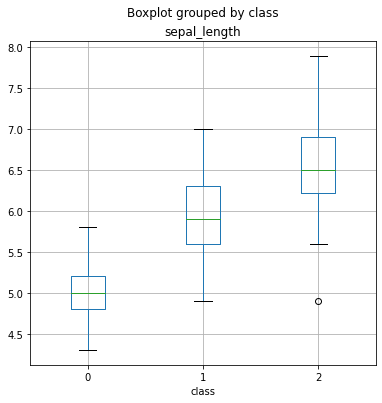

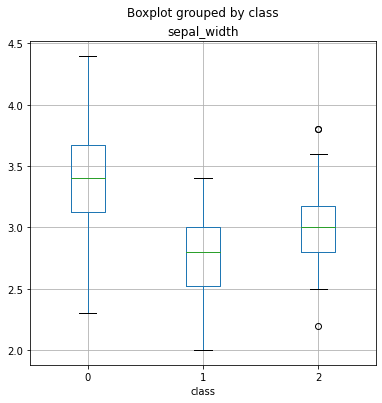

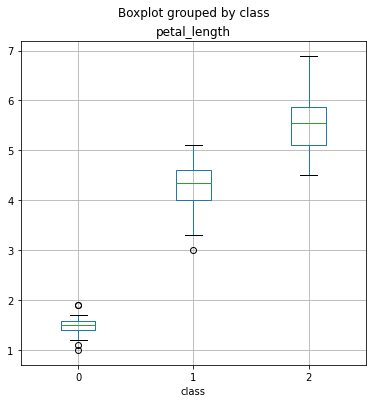

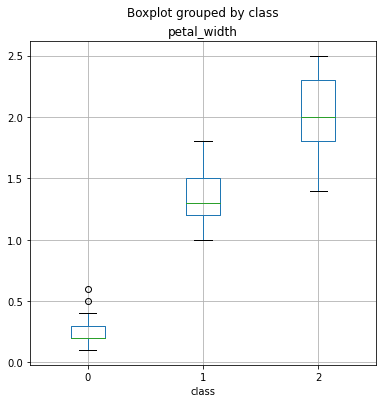

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

for col in features:
    data.boxplot(column=col, by=label, figsize=(6,6))
    plt.title(col)
plt.show()

从结果图中可以看出这三种鸢尾
- 在萼片长度上，山鸢尾要比变色鸢尾与弗吉尼亚鸢尾短，弗吉尼亚鸢尾整体萼片长度比变色鸢尾长，但二者萼片长度有重合部分
- 在萼片宽度上，山鸢尾整体上要比变色鸢尾与弗吉尼亚鸢尾宽，弗吉尼亚鸢尾整体上萼片宽度大于变色鸢尾但二者有宽度重合部分
- 在花瓣长度上，整体上呈现 `山鸢尾 < 变色鸢尾 < 弗吉尼亚鸢尾`
- 在花瓣宽度上，整体上呈现 `山鸢尾 < 变色鸢尾 < 弗吉尼亚鸢尾`

综上，可以预见的是在鸢尾花瓣的两个特征上对鸢尾进行区分的效果是值得期待的

#### 分配训练集与测试集
- 总共 150 条鸢尾数据， 分配 `70%(105)`作训练集，`30%(45)` 作为测试集

In [11]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 105
Test cases: 45


#### 标准化特征并训练模型 


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# 定义数字列的预处理（缩放它们）
feature_columns = [0, 1, 2]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 创建预处理步骤
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# 创建训练管线
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])


# 拟合管道以在训练集上训练线性回归模型
model = pipeline.fit(X_train, y_train)
print(model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2])])),
                ('regressor', LogisticRegression())])


#### 评估模型


Overall Accuracy: 0.9555555555555556
Overall Precision: 0.9511784511784511
Overall Recall: 0.9511784511784511


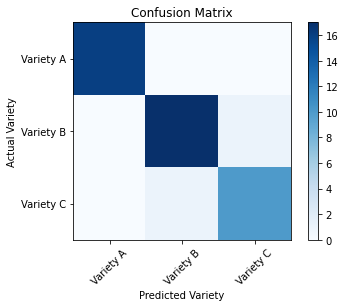

In [14]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 从测试数据中获取预测集
predictions = model.predict(X_test)

# 获取指标
print("Overall Accuracy:", accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(
    y_test, predictions, average='macro'))
print("Overall Recall:", recall_score(y_test, predictions, average='macro'))

# 绘制混淆矩阵
cm = confusion_matrix(y_test, predictions)
classes = ['Variety A', 'Variety B', 'Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()


In [17]:
from sklearn import metrics

#F1 = 2 * (precision * recall) / (precision + recall)
accuracy = metrics.accuracy_score(y_test, predictions)
confusionmatrix = metrics.confusion_matrix(y_test, predictions)
target_names = ['class 0', 'class 1', 'class 2']
classifyreport = metrics.classification_report(
    y_test, predictions, target_names=target_names)

print('分类准确率 ', accuracy)  # 混淆矩阵对角线元素之和/所有元素之和
print('混淆矩阵 \n', confusionmatrix)
print('分类结果报告 \n', classifyreport)


分类准确率  0.9555555555555556
混淆矩阵 
 [[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]
分类结果报告 
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        16
     class 1       0.94      0.94      0.94        18
     class 2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



### 优缺点
优点
- 直接、快速
- 知名度高

缺点
- 要求严格的假设
- 需要处理异常值

## 决策树

### 训练和分类

从sklearn中导入决策树分类器，对数据集进行训练和分类

In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  # 导入决策树DTC包
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  # 导入方法类

iris = load_iris()  # 导入数据集iris
iris_feature = iris.data  # 特征数据
iris_target = iris.target  # 分类数据

clf = DecisionTreeClassifier()      # 所以参数均置为默认状态
clf.fit(iris.data, iris.target)     # 使用训练集训练模型
print(clf)
predicted = clf.predict(iris.data)  # 使用模型对测试集进行预测
print(predicted)
print("精度是:{:.3f}".format(clf.score(iris.data, iris.target)))


DecisionTreeClassifier()
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
精度是:1.000


### 可视化

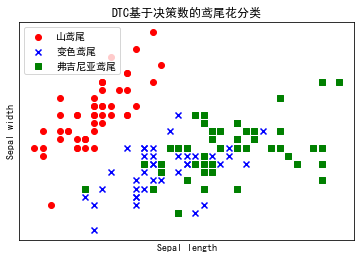

In [38]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='山鸢尾')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue',
            marker='x', label='变色鸢尾')
plt.scatter(X[100:, 0], X[100:, 1], color='green',
            marker='s', label='弗吉尼亚鸢尾')

# 使用中文字体
plt.rcParams['font.family'] = ['SimHei']

plt.title("DTC基于决策数的鸢尾花分类")  # 标题
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())
plt.legend(loc=2)
plt.show()


### 优缺点
- 优点
  - 容易解释
  - 非参数型
- 缺点
  - 趋向过拟合
  - 可能或陷于局部最小值中
  - 没有在线学习

## 神经网络


### 代码实现

Epoch 0, loss: 0.2821310982108116
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.25459614023566246
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.22570249810814857
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.21028399094939232
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.19942265003919601
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.18873639777302742
Test_acc: 0.5
--------------------------
Epoch 6, loss: 0.17851299047470093
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.16922875121235847
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.16107672825455666
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.15404684096574783
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.14802725240588188
Test_acc: 0.5333333333333333
--------------------------
Epoch 11,

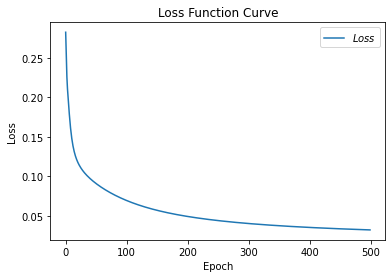

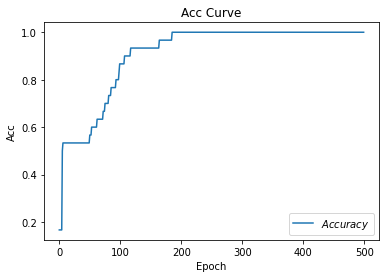

In [6]:
import tensorflow as tf
from sklearn import datasets  
from matplotlib import pyplot as plt
import numpy as np

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data  
y_data = datasets.load_iris().target 

# 随机打乱数据
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1                    # 学习率为0.1
train_loss_results = []     # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []               # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500                 # 循环500轮
loss_all = 0                # 每轮分4个step，loss_all记录四个step生成的4个loss的和

# 训练部分
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss = tf.reduce_mean(tf.square(y_ - y))
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
# 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.plot(train_loss_results, label="$Loss$")
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()


### 优缺点
- 优点
  - 在语音、语义、视觉、各类游戏（如围棋）的任务中表现极好
  - 算法可以快速调整，适应新的问题
- 缺点
  - 需要大量数据进行训练
  - 训练要求很高的硬件配置
  - 模型处于「黑箱状态」，难以理解内部机制
  - 元参数（Metaparameter）与网络拓扑选择困难。